In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from joblib import Parallel, delayed

In [12]:
# model with my equations but matlab order 
def model(t, y, params):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns = params
    
    # lhs
    cr, em, cp, cq, ct, et, cm, mt, mm, q, p, si, mq, mp, mr, r, a = y
    
    # equations
    Kgamma = gmax/Kp
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cq + cr + cp + ct + cm)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0)/(Kt+s0)
    nucat = (em*vm*si)/(Km+si)

    # rhs
    dydt = np.zeros(17)
    dydt[0] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*gamma)/nr - (f*cr)
    dydt[1] = - (lam*em) + (cm*gamma)/nx
    dydt[2] = + (r*mp*kb) - (cp*ku) - (cp*lam) - (cp*gamma)/nx - (f*cp)
    dydt[3] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*gamma)/nx - (f*cq)
    dydt[4] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*gamma)/nx - (f*ct)
    dydt[5] = - (lam*et) + (ct*gamma)/nx
    dydt[6] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*gamma)/nx - (f*cm)
    dydt[7] = + (we*a/(thetax+a)) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + ((ct*gamma)/nx)
    dydt[8] = + (we*a/(thetax+a)) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + ((cm*gamma)/nx)
    dydt[9] = - (lam*q) + (cq*gamma)/nx
    dydt[10] = - (lam*p) + (cp*gamma)/nx
    dydt[11] = - (lam*si) + (vimp) - (nucat)
    dydt[12] = + (wq*a/(thetax+a)/(1+(q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + (cq*gamma)/nx
    dydt[13] = + (wp*a/(thetax+a)) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + (cp*gamma)/nx
    dydt[14] = + (wr*a/(thetar+a)) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + (cr*gamma)/nr
    dydt[15] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + (cr*gamma)/nr + (cr*gamma)/nr + (ct*gamma)/nx + (cm*gamma)/nx + (cq*gamma)/nx + (cp*gamma)/nx
    dydt[16] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    return dydt

In [17]:
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= 1
thetar= 426.8693338968694
k_cm= 0.005990373118888
s0= 1e4
gmax= 1260.0
cl= 0
thetax= 4.379733394834643
Kt= 1.0e3
M= 1.0e8
we= 4.139172187824451
Km= 1.0e3
vm= 5800.0
nx= 300.0
Kq= 1.522190403737490e+05
Kp= 180.1378030928276
vt= 726.0
wr= 929.9678874564831
wq= 948.9349882947897
wp= 0.0
hq= 4
nr= 7549.0
ns= 0.5
params= [b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns]

In [18]:
cr_0= 0
em_0= 0
cp_0= 0
cq_0= 0
ct_0= 0
et_0= 0
cm_0= 0
mt_0= 0
mm_0= 0
q_0= 0
p_0= 0
si_0= 0
mq_0= 0
mp_0= 0
mr_0= 0
r_0= 10.0
a_0= 1000.0

init= [cr_0, em_0, cp_0, cq_0, ct_0, et_0, cm_0, mt_0, mm_0, q_0, p_0, si_0, mq_0, mp_0, mr_0, r_0, a_0]


In [19]:
t0 = 0
tf = 1e9

t1 = time.time()
sol = solve_ivp(model, [t0, tf], init, args=(params,), method='Radau')
t2 = time.time()
total = t2-t1
print(total)


0.12561392784118652


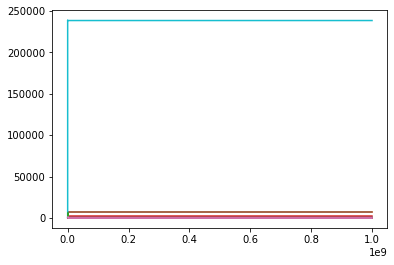

In [20]:
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'$X_{i}(t)$')
plt.show()

In [10]:
t = sol.t
cr = sol.y[0]
em = sol.y[1]
cp = sol.y[2]
cq = sol.y[3]
ct = sol.y[4]
et = sol.y[5]
cm = sol.y[6]
mt = sol.y[7]
mm = sol.y[8]
q = sol.y[9]
p = sol.y[10]
si = sol.y[11]
mq = sol.y[12]
mp = sol.y[13]
mr = sol.y[14]
r = sol.y[15]
a = sol.y[16]

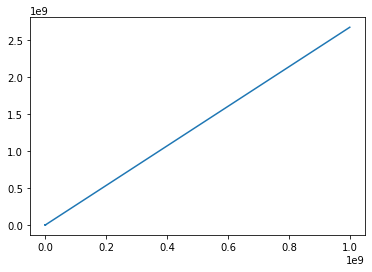

In [15]:
plt.plot(t, a)

In [2]:
# model with my equations but matlab order 
def monod_ode(t, y, params, s0):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns, Kgamma = params
    
    # lhs
    cr, em, cp, cq, ct, et, cm, mt, mm, q, p, si, mq, mp, mr, r, a = y
    
    # equations
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cq + cr + cp + ct + cm)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0/(Kt+s0))
    nucat = (em*vm*si/(Km+si))
    # rhs
    dydt = np.zeros(17)
    dydt[0] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*gamma)/nr - (f*cr)
    dydt[1] = - (lam*em) + (cm*gamma)/nx
    dydt[2] = + (r*mp*kb) - (cp*ku) - (cp*lam) - (cp*gamma)/nx - (f*cp)
    dydt[3] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*gamma)/nx - (f*cq)
    dydt[4] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*gamma)/nx - (f*ct)
    dydt[5] = - (lam*et) + (ct*gamma)/nx
    dydt[6] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*gamma)/nx - (f*cm)
    dydt[7] = + (we*a/(thetax+a)) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + ((ct*gamma)/nx)
    dydt[8] = + (we*a/(thetax+a)) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + ((cm*gamma)/nx)
    dydt[9] = - (lam*q) + (cq*gamma)/nx
    dydt[10] = - (lam*p) + (cp*gamma)/nx
    dydt[11] = - (lam*si) + vimp - nucat
    dydt[12] = + (wq*a/(thetax+a)/(1+(q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + (cq*gamma)/nx
    dydt[13] = + (wp*a/(thetax+a)) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + (cp*gamma)/nx
    dydt[14] = + (wr*a/(thetar+a)) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + (cr*gamma)/nr
    dydt[15] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + (cr*gamma)/nr + (cr*gamma)/nr + (ct*gamma)/nx + (cm*gamma)/nx + (cq*gamma)/nx + (cp*gamma)/nx
    dydt[16] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    return dydt

In [3]:
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= 0 # also is cl*kcm for later simulations
thetar= 426.8693338968694
k_cm= 0.005990373118888
# s0= 1e4
gmax= 1260.0
cl= 0
thetax= 4.379733394834643
Kt= 1.0e3
M= 1.0e8
we= 4.139172187824451
Km= 1.0e3
vm= 5800.0
nx= 300.0
Kq= 1.522190403737490e+05
Kp= 180.1378030928276
vt= 726.0
wr= 929.9678874564831
wq= 948.9349882947897
wp= 0.0
hq= 4
nr= 7549.0
ns= 0.5
Kgamma = 7
params_m = [b, dm, kb, ku, f, thetar, k_cm, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns, Kgamma]

In [10]:
cr_ss = cr[-1]
em_ss = em[-1]
cp_ss = cp[-1]
cq_ss= cq[-1]
ct_ss = ct[-1]
et_ss = et[-1]
cm_ss = cm[-1]
mt_ss = mt[-1]
mm_ss = mm[-1]
q_ss = q[-1]
p_ss = p[-1]
si_ss = si[-1]
mq_ss = mq[-1]
mp_ss = mp[-1]
mr_ss =  mr[-1]
r_ss = r[-1]
a_ss = a[-1]
zcr_0 = 0
zcq_0 = 0
zct_0 = 0
zcm_0 = 0
zcp_0 = 0

init_ss = [cr_ss, em_ss, cp_ss, cq_ss, ct_ss, et_ss, cm_ss, mt_ss, mm_ss, q_ss, p_ss, si_ss, mq_ss, mp_ss, mr_ss, r_ss, a_ss, zcr_0, zcq_0, zct_0, zcm_0, zcp_0]


In [5]:
gr = []
nutrient = np.arange(0, 5e4)
t0_m = 0
tf_m = 100 

def monod_loop(s0): # function to parallelise the code to make it run faster - only takes 10 minutes, 5 minutes with LSODA
    monod = solve_ivp(monod_ode, [t0_m, tf_m], init, args=(params_m,s0,), method='LSODA')
    a_m = monod.y[16]
    cq_m = monod.y[3]
    cr_m = monod.y[0]
    cp_m = monod.y[2]
    ct_m = monod.y[4]
    cm_m = monod.y[6]
    gamma_m = (gmax*a_m[-1]/(Kgamma+a_m[-1]))
    ttrate_m = (cq_m[-1] + cr_m[-1] + cp_m[-1] + ct_m[-1] + cm_m[-1])*gamma_m
    lam_m = ttrate_m/M
    return lam_m
gr = Parallel(n_jobs=6)(delayed(monod_loop)(s0) for s0 in nutrient)


# for s0 in nutrient: # this loop takes 30 mins to run with Radau, LSODA takes 11 mins
#     monod = solve_ivp(monod_ode, [t0_m, tf_m], init, args=(params_m,s0,), method='LSODA')
#     a_m = monod.y[16]
#     cq_m = monod.y[3]
#     cr_m = monod.y[0]
#     cp_m = monod.y[2]
#     ct_m = monod.y[4]
#     cm_m = monod.y[6]
#     gamma_m = (gmax*a_m[-1]/(Kgamma+a_m[-1]))
#     ttrate_m = (cq_m[-1] + cr_m[-1] + cp_m[-1] + ct_m[-1] + cm_m[-1])*gamma_m
#     lam_m = ttrate_m/M
#     gr.append(lam_m)



Text(0.5, 1.0, 'Monods law')

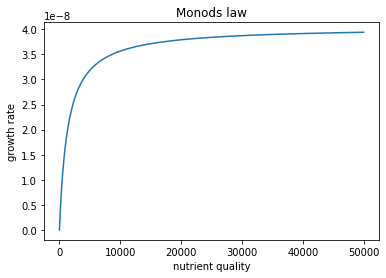

In [6]:
plt.plot(nutrient, gr)
plt.xlabel('nutrient quality')
plt.ylabel('growth rate')
plt.title('Monods law')

In [27]:
# model with my equations but matlab order 
def ns_cl_ode(t, y, params, ns, cl):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns, Kgamma = params
    
    # lhs
    cr, em, cp, cq, ct, et, cm, mt, mm, q, p, si, mq, mp, mr, r, a, zcr, zcq, zct, zcm, zcp = y
    
    # equations
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cq + cr + cp + ct + cm)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0/(Kt+s0))
    nucat = (em*vm*si/(Km+si))
    rmf = nr*(r + cr + cp + ct + cm + cq + zcr + zcp + zct + zcm + zcq) / ( nr*(r + cr + cp + ct + cm + cq + zcr + zcp + zct + zcm + zcq) + nx * (p + q + et + em))

    # rhs
    dydt = np.zeros(22)
    dydt[0] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*gamma)/nr - (f*cr)
    dydt[1] = - (lam*em) + (cm*gamma)/nx
    dydt[2] = + (r*mp*kb) - (cp*ku) - (cp*lam) - (cp*gamma)/nx - (f*cp)
    dydt[3] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*gamma)/nx - (f*cq)
    dydt[4] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*gamma)/nx - (f*ct)
    dydt[5] = - (lam*et) + (ct*gamma)/nx
    dydt[6] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*gamma)/nx - (f*cm)
    dydt[7] = + (we*a/(thetax+a)) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + ((ct*gamma)/nx)
    dydt[8] = + (we*a/(thetax+a)) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + ((cm*gamma)/nx)
    dydt[9] = - (lam*q) + (cq*gamma)/nx
    dydt[10] = - (lam*p) + (cp*gamma)/nx
    dydt[11] = - (lam*si) + vimp - nucat
    dydt[12] = + (wq*a/(thetax+a)/(1+(q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + (cq*gamma)/nx
    dydt[13] = + (wp*a/(thetax+a)) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + (cp*gamma)/nx
    dydt[14] = + (wr*a/(thetar+a)) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + (cr*gamma)/nr
    dydt[15] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + (cr*gamma)/nr + (cr*gamma)/nr + (ct*gamma)/nx + (cm*gamma)/nx + (cq*gamma)/nx + (cp*gamma)/nx
    dydt[16] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?
    # dydt[17] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*gamma)/nr - (f*cr) - (cr*cl*k_cm)
    # dydt[18] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*gamma)/nx - (f*cq) - (cq*cl*k_cm)
    # dydt[19] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*gamma)/nx - (f*ct) - (ct*cl*k_cm)
    # dydt[20] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*gamma)/nx - (f*cm) - (cm*cl*k_cm)
    # dydt[21] = + (r*mp*kb) - (cp*ku) - (cp*lam) - (cp*gamma)/nx - (f*cp) - (cp*cl*k_cm)
# these are the wrong equations, look at on monday
    return dydt

In [28]:
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= 0 # also is cl*kcm for later simulations
thetar= 426.8693338968694
k_cm= 0.005990373118888
s0= 1e4
gmax= 1260.0
# cl= 0
thetax= 4.379733394834643
Kt= 1.0e3
M= 1.0e8
we= 4.139172187824451
Km= 1.0e3
vm= 5800.0
nx= 300.0
Kq= 1.522190403737490e+05
Kp= 180.1378030928276
vt= 726.0
wr= 929.9678874564831
wq= 948.9349882947897
wp= 0.0
hq= 4
nr= 7549.0
# ns= 0.5
Kgamma = 7
params_cl = [b, dm, kb, ku, f, thetar, k_cm, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns, Kgamma]

In [29]:
cr_0= 0 # 0
em_0= 0 # 1
cp_0= 0 # 2
cq_0= 0 # 3
ct_0= 0 # 4
et_0= 0 # 5
cm_0= 0 # 6
mt_0= 0 # 7
mm_0= 0 # 8
q_0= 0 # 9
p_0= 0 # 10
si_0= 0 # 11
mq_0= 0 # 12 
mp_0= 0 # 13
mr_0= 0 # 14 
r_0= 10.0 # 15
a_0= 1000.0 # 16
zcr_0 = 0 # 17
zcq_0 = 0 # 18
zct_0 = 0 # 19
zcm_0 = 0 # 20 
zcp_0 = 0 # 21

init_cl= [cr_0, em_0, cp_0, cq_0, ct_0, et_0, cm_0, mt_0, mm_0, q_0, p_0, si_0, mq_0, mp_0, mr_0, r_0, a_0, zcr_0, zcq_0, zct_0, zcm_0, zcp_0]


In [55]:
nut_qual = np.logspace(np.log10(0.08), np.log10(0.5), num=6)
chloram = [0, 2, 4, 8, 12]
r_mass_frac = []
lambdas = []
growth_rate = np.arange(0, 0.03)
for ns in nut_qual:
    for cl in chloram:
        nscl = solve_ivp(ns_cl_ode, [t0_m, tf_m], init_ss, args=(params_cl, ns, cl), method='LSODA')
        r_1 = nscl.y[15][-1]
        cr_1 = nscl.y[0][-1]
        cp_1 = nscl.y[2][-1]
        ct_1 = nscl.y[4][-1]
        cm_1 = nscl.y[6][-1]
        cq_1 = nscl.y[3][-1]
        zcr_1 = nscl.y[17][-1]
        zcp_1 = nscl.y[21][-1]
        zct_1 = nscl.y[19][-1]
        zcm_1 = nscl.y[20][-1]
        zcq_1 = nscl.y[18][-1]
        p_1 = nscl.y[10][-1]
        q_1 = nscl.y[9][-1]
        et_1 = nscl.y[5][-1]
        em_1 = nscl.y[1][-1]
        a_1 = nscl.y[16][-1]
        gamma = (gmax*a_1)/(Kgamma+a_1)
        ttrate = (cq_1 + cr_1 + cp_1 + ct_1 + cm_1)*gamma
        lam = ttrate/M
        rmf = nr*(r_1 + cr_1 + cp_1 + ct_1 + cm_1 + cq_1 + zcr_1 + zcp_1 + zct_1 + zcm_1 + zcq_1) / ( nr*(r_1 + cr_1 + cp_1 + ct_1 + cm_1 + cq_1 + zcr_1 + zcp_1 + zct_1 + zcm_1 + zcq_1) + nx * (p_1 + q_1 + et_1 + em_1))
        r_mass_frac.append(rmf)
        lambdas.append(lam)

In [58]:
r_mass_frac = np.reshape(r_mass_frac, [5,6])
lambdas = np.reshape(lambdas, [5,6])


In [59]:
print(list(r_mass_frac[0]))

[-1.353992918946732e-18, -1.353992918946732e-18, -1.353992918946732e-18, -1.353992918946732e-18, -1.353992918946732e-18, -1.353992918946732e-18]


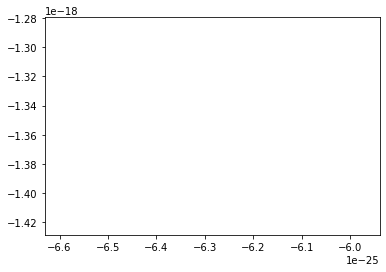

In [60]:
plt.plot(lambdas, r_mass_frac)